<a href="https://colab.research.google.com/github/IshitaxSharma/API_using_FastAPI/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [308]:
warnings.filterwarnings("ignore", category=UserWarning)
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

# New Section

In [309]:
# Feature engineering: Create a new feature 'chol_thalach_sum'
heart_data['chol_thalach_sum'] = heart_data['chol'] + heart_data['thalach']

# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_thalach_sum
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,380
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,358
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,299
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,364
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,400


In [310]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_thalach_sum
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,385
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,399
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,393
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,413
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,301


In [311]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 15)

In [312]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1025 non-null   int64  
 1   sex               1025 non-null   int64  
 2   cp                1025 non-null   int64  
 3   trestbps          1025 non-null   int64  
 4   chol              1025 non-null   int64  
 5   fbs               1025 non-null   int64  
 6   restecg           1025 non-null   int64  
 7   thalach           1025 non-null   int64  
 8   exang             1025 non-null   int64  
 9   oldpeak           1025 non-null   float64
 10  slope             1025 non-null   int64  
 11  ca                1025 non-null   int64  
 12  thal              1025 non-null   int64  
 13  target            1025 non-null   int64  
 14  chol_thalach_sum  1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


In [313]:
# checking for missing values
heart_data.isnull().sum()

age                 0
sex                 0
cp                  0
trestbps            0
chol                0
fbs                 0
restecg             0
thalach             0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
target              0
chol_thalach_sum    0
dtype: int64

In [314]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_thalach_sum
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171,395.114146
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070,56.030053
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,364.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,393.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,428.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,724.000000


In [315]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

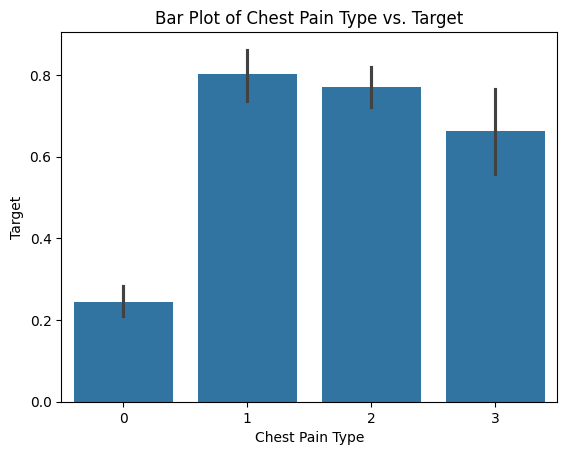

In [316]:
#Splitting the features and targets
X = heart_data.drop(columns='target', axis = 1)
Y = heart_data['target']

# Example bar plot using seaborn
sns.barplot(x=heart_data["cp"], y=heart_data["target"])
plt.title('Bar Plot of Chest Pain Type vs. Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Target')
plt.show()

In [317]:
X_train.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'chol_thalach_sum']
# Standardize numerical features
scaler = StandardScaler()
X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'chol_thalach_sum']] = scaler.fit_transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'chol_thalach_sum']])

In [318]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1025, 14) (820, 14) (205, 14)


In [319]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [320]:
# Model evaluation for logistic regression
X_test_prediction_logistic = logistic_model.predict(X_test)
print("Logistic Regression - Test Classification Report:")
print(classification_report(Y_test, X_test_prediction_logistic))
print("Logistic Regression - Test Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction_logistic))
print("Logistic Regression - Test Accuracy:", accuracy_score(Y_test, X_test_prediction_logistic))

Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       100
           1       0.79      0.88      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

Logistic Regression - Test Confusion Matrix:
[[75 25]
 [13 92]]
Logistic Regression - Test Accuracy: 0.8146341463414634


In [321]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [322]:
# Model evaluation for random forest
X_test_prediction_rf = random_forest_model.predict(X_test)
print("Random Forest - Test Classification Report:")
print(classification_report(Y_test, X_test_prediction_rf))
print("Random Forest - Test Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction_rf))
print("Random Forest - Test Accuracy:", accuracy_score(Y_test, X_test_prediction_rf))

Random Forest - Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Random Forest - Test Confusion Matrix:
[[100   0]
 [  0 105]]
Random Forest - Test Accuracy: 1.0


In [323]:
# Example: Feature Importance for Random Forest
print("Random Forest - Feature Importance:", random_forest_model.feature_importances_)

# Example: Input data for prediction
input_data = np.array([41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 334]).reshape(1, -1)

Random Forest - Feature Importance: [0.08122056 0.0349256  0.11407035 0.06150292 0.06517852 0.01061481
 0.01679016 0.10247252 0.08125689 0.09126812 0.04789502 0.10772949
 0.1182678  0.06680724]


In [324]:
# Make predictions using logistic regression
prediction_logistic = logistic_model.predict(input_data)
print("Logistic Regression Prediction:", prediction_logistic)

# Make predictions using random forest
prediction_rf = random_forest_model.predict(input_data)
print("Random Forest Prediction:", prediction_rf)

# Output the final result based on the majority vote
final_prediction = 1 if (prediction_logistic + prediction_rf) >= 1 else 0
print("Final Prediction:")
if final_prediction == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

Logistic Regression Prediction: [1]
Random Forest Prediction: [1]
Final Prediction:
The Person has Heart Disease


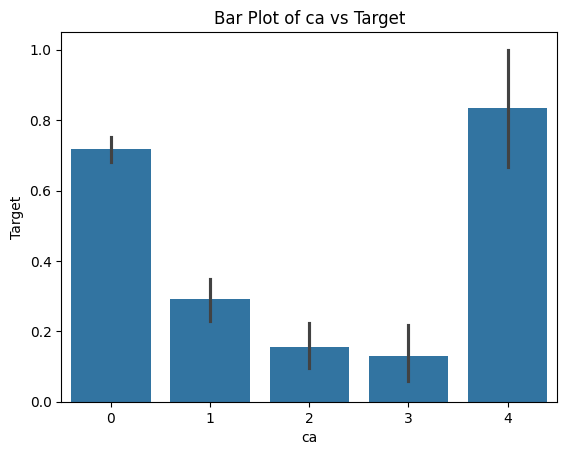

In [325]:
sns.barplot(x=heart_data["ca"], y=heart_data["target"])
plt.title('Bar Plot of ca vs Target')
plt.xlabel('ca')
plt.ylabel('Target')
plt.show()

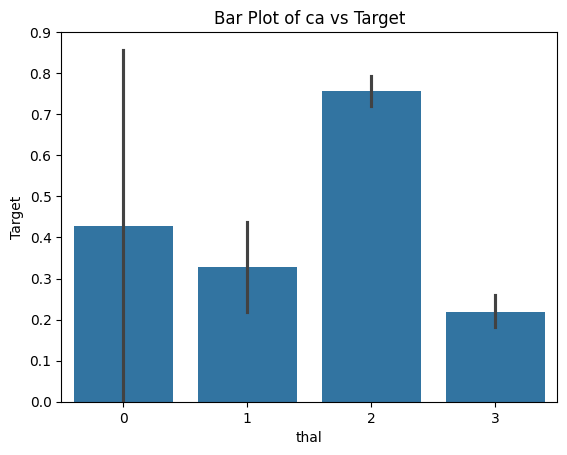

In [326]:
sns.barplot(x=heart_data["thal"], y=heart_data["target"])
plt.title('Bar Plot of ca vs Target')
plt.xlabel('thal')
plt.ylabel('Target')
plt.show()

<Axes: ylabel='Density'>

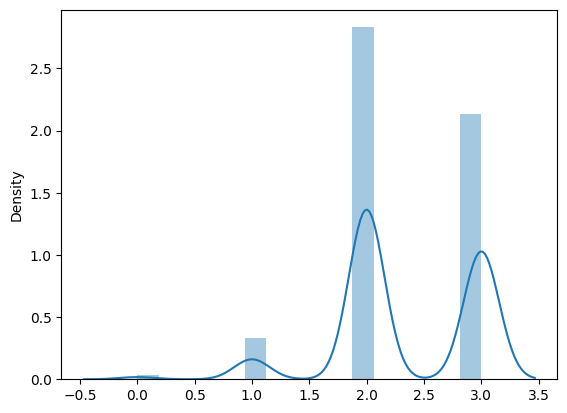

In [327]:
sns.distplot(x=heart_data["thal"])

In [328]:
# Combine predictions and calculate overall accuracy
final_prediction = np.array([1 if (log_pred + rf_pred) >= 1 else 0 for log_pred, rf_pred in zip(X_test_prediction_logistic, X_test_prediction_rf)])
accuracy_final = accuracy_score(Y_test, final_prediction)
print("Overall Accuracy:", accuracy_final)

Overall Accuracy: 0.8780487804878049
